In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = pd.read_csv("GC=F.csv",index_col="Date",parse_dates=True)
df.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-09-03  1522.900024  1547.300049  1521.000000  1545.900024  1545.900024   
2019-09-04  1549.000000  1553.199951  1534.800049  1550.300049  1550.300049   
2019-09-05  1551.000000  1551.099976  1511.099976  1515.400024  1515.400024   
2019-09-06  1517.300049  1526.000000  1504.500000  1506.199951  1506.199951   
2019-09-08          NaN          NaN          NaN          NaN          NaN   

            Volume  
Date                
2019-09-03   139.0  
2019-09-04    46.0  
2019-09-05   125.0  
2019-09-06    54.0  
2019-09-08     NaN

In [3]:
df.describe()

Open         High          Low        Close    Adj Close  \
count   283.000000   283.000000   283.000000   283.000000   283.000000   
mean   1654.103179  1664.331449  1643.753358  1654.146642  1654.146642   
std     158.254543   160.626563   156.164499   158.780776   158.780776   
min    1454.900024  1454.900024  1447.099976  1452.099976  1452.099976   
25%    1507.599976  1513.049988  1498.200012  1506.649964  1506.649964   
50%    1637.000000  1647.500000  1619.800049  1640.000000  1640.000000   
75%    1743.500000  1750.649964  1734.550049  1742.799988  1742.799988   
max    2045.500000  2063.000000  2040.000000  2051.500000  2051.500000   

             Volume  
count  2.830000e+02  
mean   1.810595e+06  
std    1.610130e+07  
min    1.000000e+00  
25%    9.900000e+01  
50%    3.330000e+02  
75%    1.024000e+03  
max    1.752447e+08

In [4]:
df.fillna(method='ffill', inplace=True)

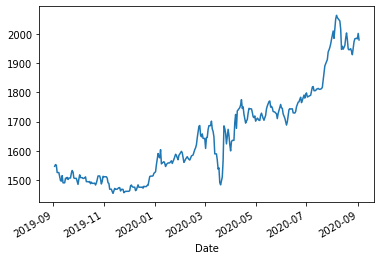

In [5]:
df["High"].plot()

In [6]:
#df["Volume"]

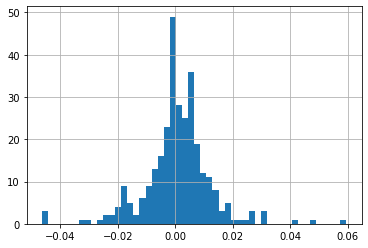

In [7]:
df['Close'].pct_change().hist(bins=50)

In [8]:
# 30 days is a good approximation of a single month
df['30d mavg'] = df['Close'].rolling(window=30).mean()
df['30d std'] = df['Close'].rolling(window=30).std()

df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

[Text(0, 0, '2019-09-03 00:00:00'),
 Text(0, 0, '2019-09-04 00:00:00'),
 Text(0, 0, '2019-09-05 00:00:00'),
 Text(0, 0, '2019-09-06 00:00:00'),
 Text(0, 0, '2019-09-08 00:00:00'),
 Text(0, 0, '2019-09-09 00:00:00'),
 Text(0, 0, '2019-09-10 00:00:00')]

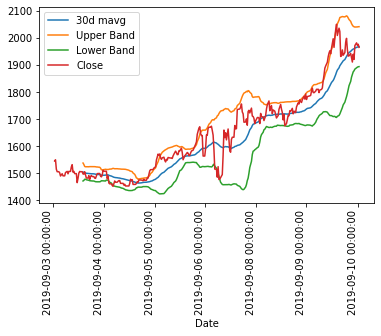

In [9]:
cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll = df[cols]
df_Boll.plot().set_xticklabels(df.index, rotation = 90)

<IPython.core.display.Javascript object>


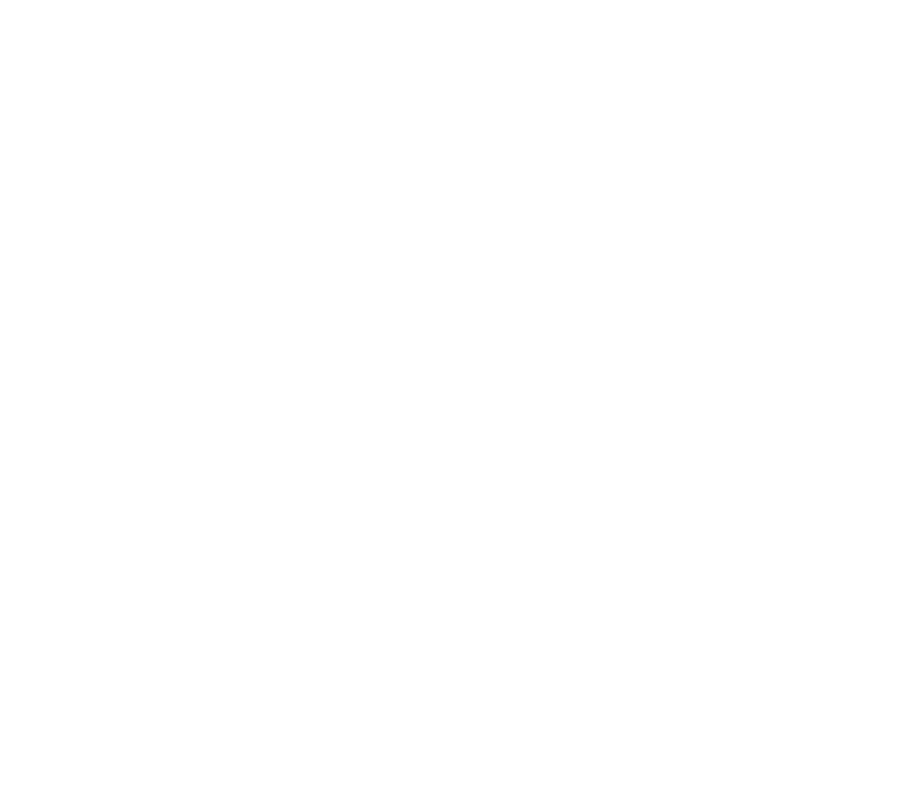

In [10]:
%matplotlib notebook
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll.index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll['Upper Band'], 
                df_Boll['Lower Band'], 
                color='grey')

ax.plot(x_axis, df_Boll['Close'], color='blue', lw=2)
ax.plot(x_axis, df_Boll['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('2019-2020 Bollinger Band for GC')
ax.set_xlabel('Dates')
ax.set_ylabel('Price (USD)')

plt.show();

In [11]:
df2 = pd.read_csv("TSLA.csv",index_col="Date",parse_dates=True)
df2.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-09-03  44.816002  45.790001  44.632000  45.001999  45.001999  26770500
2019-09-04  45.377998  45.692001  43.841999  44.136002  44.136002  28805000
2019-09-05  44.500000  45.959999  44.169998  45.916000  45.916000  36976500
2019-09-06  45.439999  45.928001  45.034000  45.490002  45.490002  20947000
2019-09-09  46.000000  46.751999  45.846001  46.358002  46.358002  24013500

In [12]:
df2.loc[df2.index == "2020-08-25"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-08-25  394.977997  405.589996  393.600006  404.667999  404.667999   

              Volume  
Date                  
2020-08-25  53294500

In [13]:
df2['30d mavg'] = df2['Close'].rolling(window=30).mean()
df2['30d std'] = df2['Close'].rolling(window=30).std()

df2['Upper Band'] = df2['30d mavg'] + (df2['30d std'] * 2)
df2['Lower Band'] = df2['30d mavg'] - (df2['30d std'] * 2)

In [14]:
cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll2 = df2[cols]

<IPython.core.display.Javascript object>


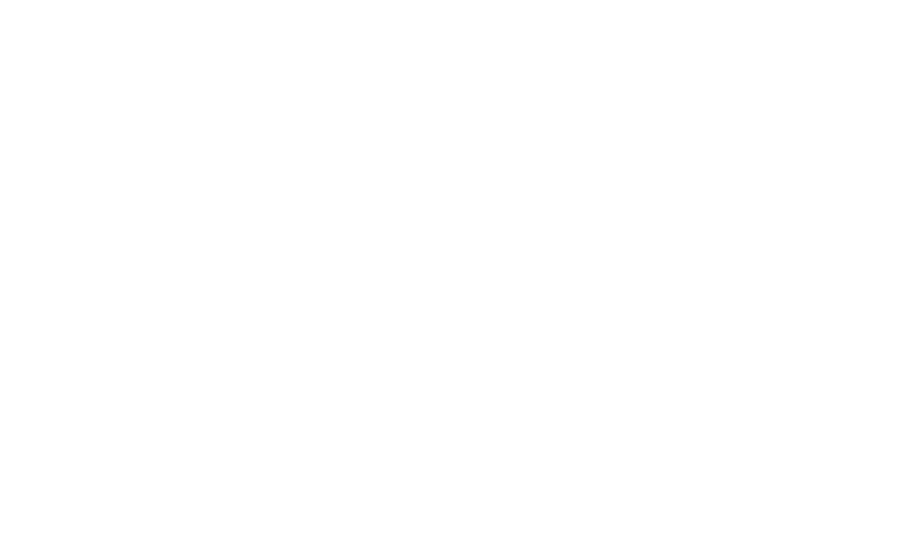

In [15]:
%matplotlib notebook
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll2.index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll2['Upper Band'], 
                df_Boll2['Lower Band'], 
                color='grey')

ax.plot(x_axis, df_Boll2['Close'], color='blue', lw=2)
ax.plot(x_axis, df_Boll2['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('2019-2020 Bollinger Band for TSLA')
ax.set_xlabel('Dates')
ax.set_ylabel('Price (USD)')

plt.show();


<IPython.core.display.Javascript object>


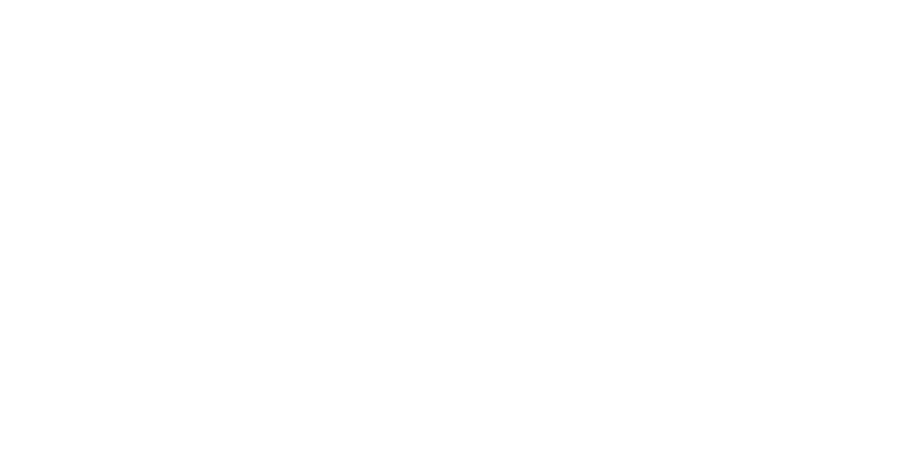

In [16]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Volume', color=color)
ax1.bar(df2.index.get_level_values(0), df2["Volume"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Close', color=color)  # we already handled the x-label with ax1
ax2.plot(df2.index.get_level_values(0), df2["Close"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

mean = df2['Volume'].mean()
ax1.axhline(mean)

plt.show()

# Exploring with machine learning 


In [28]:
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')


In [29]:
df_gold = pd.read_csv("GC=F.csv",index_col="Date",parse_dates=True)

In [30]:
df_gold.describe()

Open         High          Low        Close    Adj Close  \
count   283.000000   283.000000   283.000000   283.000000   283.000000   
mean   1654.103179  1664.331449  1643.753358  1654.146642  1654.146642   
std     158.254543   160.626563   156.164499   158.780776   158.780776   
min    1454.900024  1454.900024  1447.099976  1452.099976  1452.099976   
25%    1507.599976  1513.049988  1498.200012  1506.649964  1506.649964   
50%    1637.000000  1647.500000  1619.800049  1640.000000  1640.000000   
75%    1743.500000  1750.649964  1734.550049  1742.799988  1742.799988   
max    2045.500000  2063.000000  2040.000000  2051.500000  2051.500000   

             Volume  
count  2.830000e+02  
mean   1.810595e+06  
std    1.610130e+07  
min    1.000000e+00  
25%    9.900000e+01  
50%    3.330000e+02  
75%    1.024000e+03  
max    1.752447e+08

In [31]:
df_gold = df_gold.dropna()
df_gold.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-09-03  1522.900024  1547.300049  1521.000000  1545.900024  1545.900024   
2019-09-04  1549.000000  1553.199951  1534.800049  1550.300049  1550.300049   
2019-09-05  1551.000000  1551.099976  1511.099976  1515.400024  1515.400024   
2019-09-06  1517.300049  1526.000000  1504.500000  1506.199951  1506.199951   
2019-09-09  1509.000000  1513.000000  1498.000000  1502.199951  1502.199951   

            Volume  
Date                
2019-09-03   139.0  
2019-09-04    46.0  
2019-09-05   125.0  
2019-09-06    54.0  
2019-09-09    69.0

In [32]:
df_gold.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
df_gold['30d mavg'] = df_gold['Close'].rolling(window=3).mean()
df_gold['30d std'] = df_gold['Close'].rolling(window=9).std()
df_gold['next_day_price'] = df_gold['Close'].shift(-1)

In [34]:
df_gold.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume            float64
30d mavg          float64
30d std           float64
next_day_price    float64
dtype: object

In [35]:
df_gold = df_gold.dropna()

In [36]:
df_gold.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
30d mavg          0
30d std           0
next_day_price    0
dtype: int64

In [37]:
X = df_gold[['30d mavg', '30d std']]
y = df_gold['next_day_price']

In [38]:
# Split the data into train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(X_test)

30d mavg    30d std
Date                              
2020-05-21  1738.433309  20.463280
2020-03-18  1496.033366  82.022144
2020-07-24  1883.500000  37.424952
2019-09-20  1504.400024   6.667218
2019-10-15  1483.999959  10.416547
...                 ...        ...
2020-08-06  2027.933309  39.132621
2020-05-28  1709.466716  15.588461
2020-02-24  1661.500000  36.513786
2019-11-19  1470.500041   7.346962
2020-05-04  1702.600016  16.348442

[219 rows x 2 columns]

30d mavg    30d std
Date                              
2020-06-30  1784.366699  11.828483
2020-08-17  1956.266683  41.225992
2020-06-11  1720.000000  18.806636
2020-02-16  1581.199992   7.487407
2020-05-12  1702.766683  10.314827
2020-04-21  1689.999959  27.710470
2020-01-21  1557.500041   5.908898
2020-07-14  1808.566651   9.887033
2019-12-03  1464.633341   8.353805
2020-06-07  1693.066650  26.157948
2020-06-22  1754.466675  14.349905
2020-07-30  1946.833333  38.460529
2020-06-21  1743.833374  12.447571
2020-03-06  1659.433350  34.246800
2020-01-30  1574.166667  10.073287
2019-10-04  1504.766642  18.357048
2019-09-25  1520.133301  12.532618
2020-04-09  1688.800008  49.240710
2019-12-09  1465.100016   9.356536
2020-05-11  1704.600016  10.859014
2019-11-15  1466.933350  12.114503
2020-02-23  1642.899984  33.191452
2020-06-18  1727.866659   8.704553
2020-04-20  1693.666626  24.280029
2019-12-13  1470.566650   7.533659
2019-09-24  1521.033325  12.886586
2020-01-24  1563.666667   8.368980
2020-07-21  1822.933349  12.223263
2020-05-03  1695.033325  18.155031
2020-01-10  1555.533325  18.860934
2020-03-30  1636.699992  68.737263
2020-02-25  1662.266683  33.993404
2020-02-06  1557.766683  13.549078
2020-07-16  1806.899984   6.448430
2019-12-31  1515.933350  20.251323
2020-03-22  1486.066651  57.180044
2020-07-15  1811.000000   8.452541
2020-01-13  1555.266683   8.899739
2019-12-16  1472.433309   7.113720
2020-08-16  1946.833333  48.748381
2020-02-04  1573.699992  12.204688
2020-07-09  1806.299967  13.683444
2020-05-05  1705.900024  15.474834
2020-02-10  1573.533325  13.090171
2019-10-22  1484.099975   5.789234
2020-07-08  1802.733317  13.427088
2020-05-27  1715.066691  19.785907
2020-05-18  1751.033366  24.472250
2020-07-01  1780.333333  11.133973
2019-11-05  1498.933350  10.508896
2020-08-26  1926.733317  28.063811
2020-03-20  1479.966675  72.005395
2019-10-11  1494.533325   9.486565
2020-01-05  1548.333333  29.788306
2020-05-22  1735.233317  16.758064

In [39]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

r_sq = model.score(X_train, y_train)
pri

print("Linear Regression model")
print("Gold Price (y) = %.2f * 2 Days Moving Average (x1) \
+ %.2f * 5 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold Price (y) = 1.00 * 2 Days Moving Average (x1) + -0.09 * 5 Days Moving Average (x2) + 3.66 (constant)


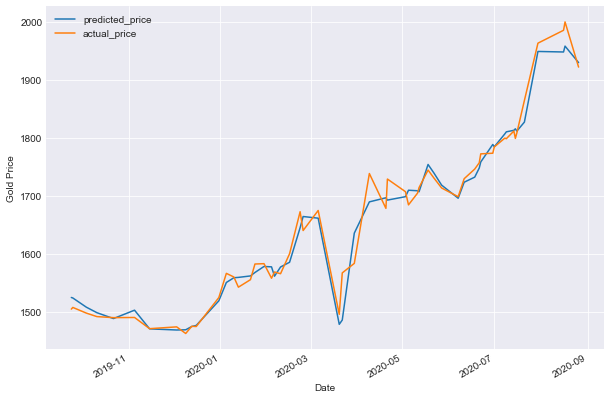

In [40]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()



plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()